In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [6]:
df_imdb = pd.read_csv('game_of_thrones_imdb.csv')
df_episodes = pd.read_csv('game_of_thrones_episodes.csv')

In [7]:
df_imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Winter Is Coming,17 Apr. 2011,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,The Kingsroad,24 Apr. 2011,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,Lord Snow,1 May 2011,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,"Cripples, Bastards, and Broken Things",8 May 2011,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,The Wolf and the Lion,15 May 2011,9.0,32818,Catelyn has captured Tyrion and plans to bring...


In [8]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 73 non-null     int64  
 1   episode_num_in_season  73 non-null     int64  
 2   episode_num_overall    73 non-null     int64  
 3   title                  73 non-null     object 
 4   directed_by            73 non-null     object 
 5   written_by             73 non-null     object 
 6   original_air_date      73 non-null     object 
 7   us_viewers             73 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.7+ KB


In [9]:
df = df_imdb.merge(df_episodes, how = 'outer', left_on = ['season','episode_num','title'], right_on = ['season','episode_num_in_season','title'])
df = df.drop(columns = ['episode_num_in_season','original_air_date_x'])

In [10]:
df.head()

,season,episode_num,title,imdb_rating,total_votes,desc,episode_num_overall,directed_by,written_by,original_air_date_y,us_viewers
0,1,1,Winter Is Coming,9.0,46180,Eddard Stark is torn between his family and an...,1,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0
1,1,2,The Kingsroad,8.6,35052,"While Bran recovers from his fall, Ned takes o...",2,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0
2,1,3,Lord Snow,8.5,33200,Jon begins his training with the Night's Watch...,3,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0
3,1,4,"Cripples, Bastards, and Broken Things",8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...,4,Brian Kirk,Bryan Cogman,2011-05-08,2450000.0
4,1,5,The Wolf and the Lion,9.0,32818,Catelyn has captured Tyrion and plans to bring...,5,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0


In [11]:
df_writters = df.groupby('written_by')['title'].count().reset_index().sort_values(by = 'title', ascending = False)
df_directed = df.groupby('directed_by')['title'].count().reset_index().sort_values(by = 'title', ascending = False)

### Кто главный режисер и автор эпизодов:

C:\Users\Dmi\AppData\Local\Temp/ipykernel_1096/2339932910.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


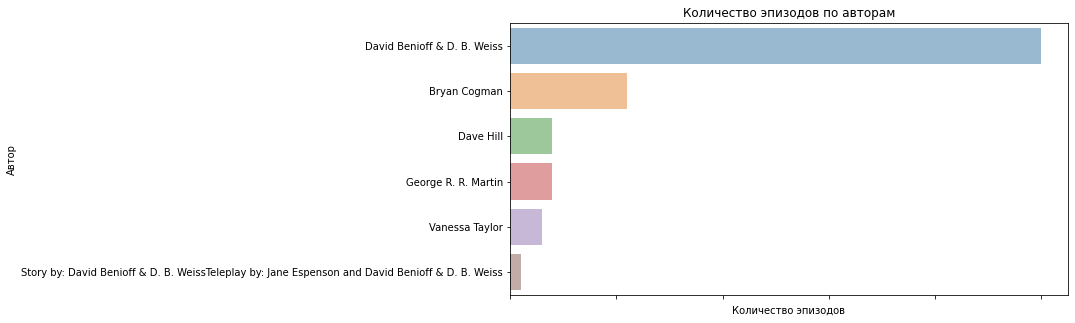

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x=df_writters['title'], y = df_writters['written_by'], alpha = 0.5)
ax.set_title('Количество эпизодов по авторам')
ax.set_xlabel('Количество эпизодов')
ax.set_ylabel('Автор')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

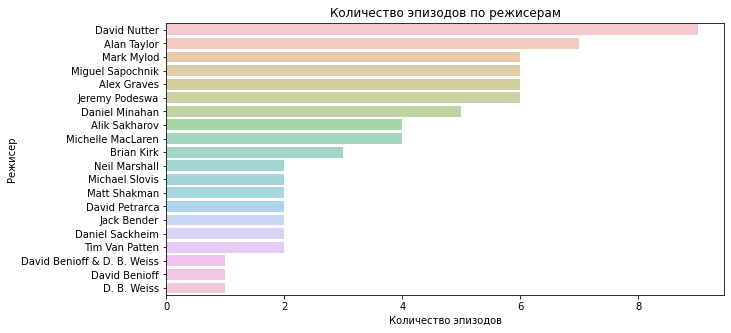

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = df_directed['title'], y = df_directed['directed_by'], alpha = 0.5)
ax.set_title('Количество эпизодов по режисерам')
ax.set_xlabel('Количество эпизодов')
ax.set_ylabel('Режисер')
plt.show()

<br> На имеющихся данных, невозможно выделить главного режисера лишь по поличеству созданных эпизодов сериала. Однако наибольшее количество эпизодов выпустил David Nutter.
<br> Однако главного автора, на имеющихся данных, мы выделить можем. David Benioff и D.B. Weiss стали авторами большинства эпизодов сериала.

### Рассмотрим рейтинги сезонов:

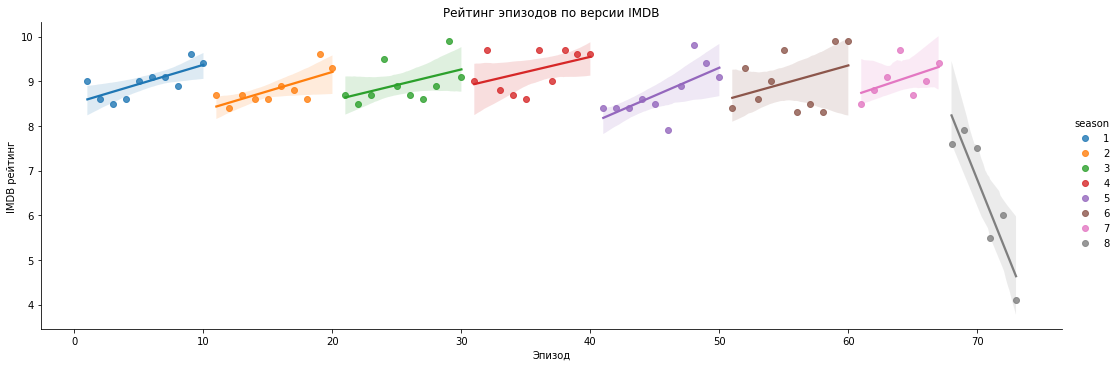

In [16]:
sns.lmplot(x="episode_num_overall", y="imdb_rating", hue="season", data=df,  aspect=3)
plt.xlabel('Эпизод')
plt.ylabel('IMDB рейтинг')
plt.title('Рейтинг эпизодов по версии IMDB');

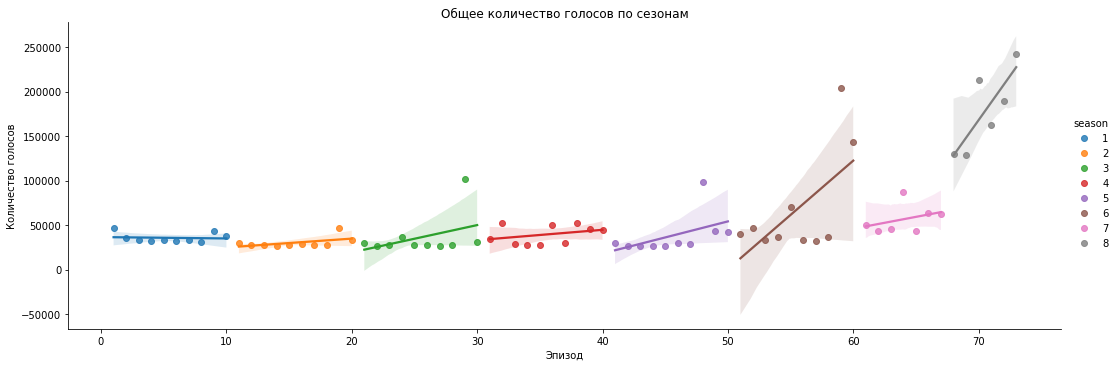

In [17]:
sns.lmplot(x="episode_num_overall", y="total_votes", hue="season", data=df,  aspect=3)
plt.xlabel('Эпизод')
plt.ylabel('Количество голосов')
plt.title('Общее количество голосов по сезонам');

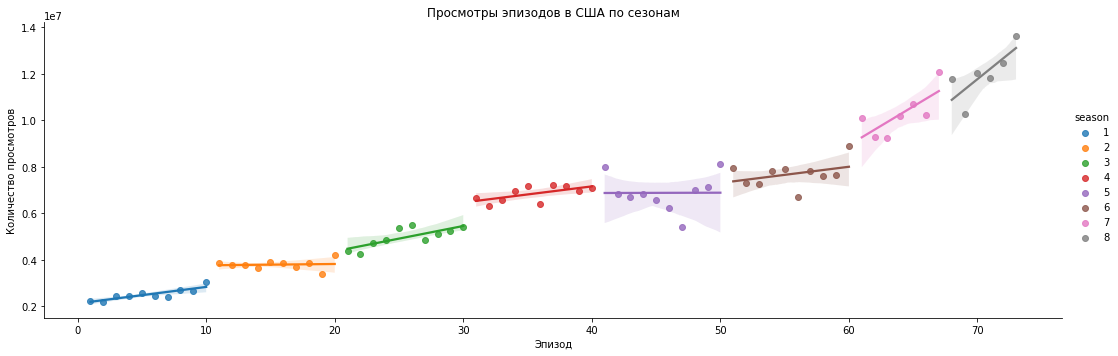

In [18]:
sns.lmplot(x="episode_num_overall", y="us_viewers", hue="season", data=df,  aspect=3)
plt.xlabel('Эпизод')
plt.ylabel('Количество просмотров')
plt.title('Просмотры эпизодов в США по сезонам');

<br>     По мере развития сериала и выхода новых сезонов "Игры престолов" количество просмотров в США росло от сезона к сезону.
<br>     Общее количество проголосовавших, в среднем,  по каждому сезону было одинаковым, за исключением 8 сезона. В 8 сезоне резко увеличилось количество проголосовавших пользователей.
<br>     Рейтинги эпизодов, по версии IMDB, на протяжении всех сезонов, за исключением последнего, держались на стабильно высоком уровне.
<br>     Гистограммы распределения количества проголосовавших пользователей и рейтингов по версии IMDB демонстрируют резкое повышение рецензий на фоне нетипично низких оценок эпизодов 8 сезона. Исходя из чего мы можем предположить, что на зрителей,  кто ранее воздерживался от оценки эпизода, восьмой сезон оказал такое впечатление, что они оставили отзывы о сериале и, судя по оценкам, впечатление было негативным.

### Рассмотрим персонажей, упоминаемых в описании каждой серии:

In [20]:
# Исправим некоторые описания, так как у некоторых персонажей несколько имен
df['desc'] = df['desc'].str.replace('Ned', 'Eddard')
df['desc'] = df['desc'].str.replace('The Hound', 'Sandor Clegane')

In [58]:
main_characters = ['Eddard', 'Sandor Clegane', 'Robert', 'Jaime', 'Catelyn', 'Cersei', 'Daenerys', 'Jorah', 'Viserys',
                   'Jon', 'Robb', 'Sansa', 'Arya', 'Theon', 'Bran', 'Joffrey', 'Tyrion',
                   'Drogo', 'Littlefinger', 'Davos', 'Samwell', 'Stannis', 'Melisandre', 'Bronn',
                   'Varys', 'Shae', 'Margaery', 'Tywin', 'Talisa', 'Ygritte', 'Gendry', 'Tormund',
                   'Brienne', 'Ramsay', 'Gilly', 'Daario', 'Tommen', 'Ellaria', 'Jaqen',
                   'High Sparrow']

In [60]:
# При упоминании персонажа в описании серии отметим его наличие в соответствующей колонке
for name in main_characters:
    df[name] = np.where(df['desc'].str.contains(name), 1, 0)


In [61]:
# Проссумируем все упоминания персонажей и выделим главных
characters = df[main_characters].sum().sort_values(ascending = False)

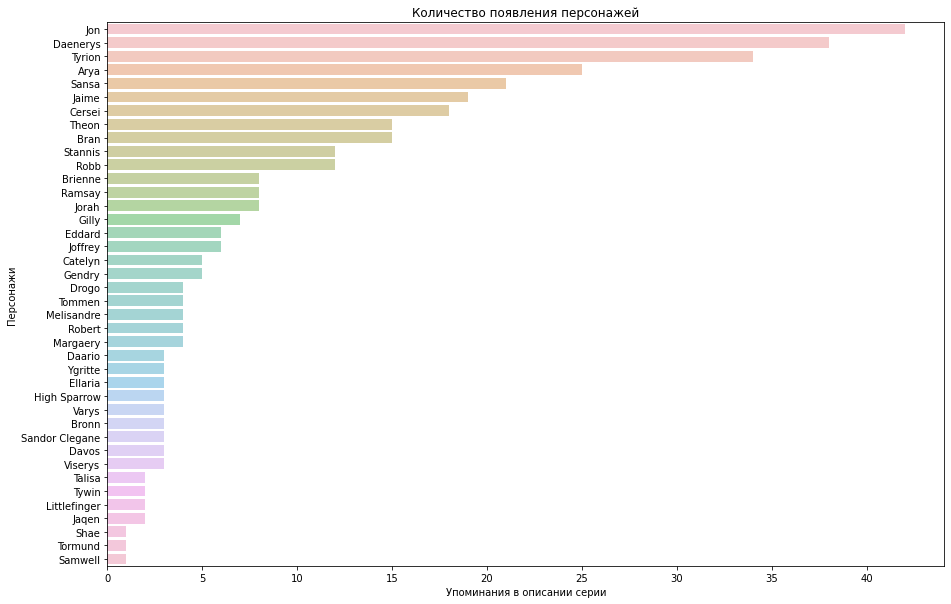

In [75]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(x = characters.values, y = characters.index , alpha = 0.5)
ax.set_title('Количество появления персонажей')
ax.set_xlabel('Упоминания в описании серии')
ax.set_ylabel('Персонажи')
plt.show()

### Вывод:
На имеющихся данных мы можем сделать следующие выводы:
Последний сезон Сериала "Игра престлов" вызвал бурные обсуждения в сети и был оценен намного ниже, чем любой другой сезон. Однако это не помешало собрать рекордные просмотры в США.
Главными действующими лицами всего сериала можно назвать: Джона Сноу, Дайнерис, Тириона Ланистера, Арию и Сансу Старк.